<a href="https://colab.research.google.com/github/IndraMadika/ML_Study/blob/main/Pre_processing_part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [20]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod ~/.kaggle/kaggle.json

!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

chmod: missing operand after ‘/root/.kaggle/kaggle.json’
Try 'chmod --help' for more information.
100% 3.58G/3.58G [02:31<00:00, 25.2MB/s]
100% 3.58G/3.58G [02:31<00:00, 25.4MB/s]


In [23]:


import zipfile

local_dataset_zip = '/content/fruits-fresh-and-rotten-for-classification.zip'
zip_buka = zipfile.ZipFile(local_dataset_zip, 'r')
zip_buka.extractall('/content')
zip_buka.close()

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/dataset/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/dataset/dataset/train/freshapples/vertical_flip_Screen Shot 2018-06-08 at 5.16.57 PM.png
/content/dataset/dataset/train/freshapples/translation_Screen Shot 2018-06-08 at 5.21.31 PM.png
/content/dataset/dataset/train/freshapples/vertical_flip_Screen Shot 2018-06-08 at 5.18.42 PM.png
/content/dataset/dataset/train/freshapples/rotated_by_60_Screen Shot 2018-06-08 at 5.26.13 PM.png
/content/dataset/dataset/train/freshapples/rotated_by_15_Screen Shot 2018-06-08 at 5.26.41 PM.png
/content/dataset/dataset/train/freshapples/rotated_by_60_Screen Shot 2018-06-08 at 5.23.31 PM.png
/content/dataset/dataset/train/freshapples/rotated_by_45_Screen Shot 2018-06-08 at 5.33.11 PM.png
/content/dataset/dataset/train/freshapples/rotated_by_30_Screen Shot 2018-06-08 at 5.11.02 PM.png
/content/dataset/dataset/train/freshapples/rotated_by_75_Screen Shot 2018-06-08 at 5.22.20 PM.png
/content/dataset/dataset/train/freshapples/translation_Screen Shot 20

In [26]:
import matplotlib.pyplot as plt

In [32]:
train_dir = '/content/dataset/dataset/train'
test_dir = '/content/dataset/dataset/test'

In [33]:
# Train Dataset

#fresh
fresh_apples_train_dir = os.path.join(train_dir, 'freshapples')
fresh_banana_train_dir = os.path.join(train_dir, 'freshbanana')
fresh_oranges_train_dir = os.path.join(train_dir, 'freshoranges')

#rotten
rotten_apples_train_dir = os.path.join(train_dir, 'rottenapples')
rotten_banana_train_dir = os.path.join(train_dir, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(train_dir, 'rottenoranges')

In [34]:
# Test Dataset

#fresh
fresh_apples_test_dir = os.path.join(test_dir, 'freshapples')
fresh_banana_test_dir = os.path.join(test_dir, 'freshbanana')
fresh_oranges_test_dir = os.path.join(test_dir, 'freshoranges')

#rotten
rotten_apples_test_dir = os.path.join(test_dir, 'rottenapples')
rotten_banana_test_dir = os.path.join(test_dir, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(test_dir, 'rottenoranges')

In [35]:
print("No. of train fresh apple image : ", len(os.listdir(fresh_apples_train_dir)))
print("No. of train fresh banana image : ", len(os.listdir(fresh_banana_train_dir)))
print("No. of train fresh orange image : ", len(os.listdir(fresh_oranges_train_dir)))
print("No. of train rotten apple image : ", len(os.listdir(rotten_apples_train_dir)))
print("No. of train rotten banana image : ", len(os.listdir(rotten_banana_train_dir)))
print("No. of train rotten orange image : ", len(os.listdir(rotten_oranges_train_dir)))

No. of train fresh apple image :  1693
No. of train fresh banana image :  1581
No. of train fresh orange image :  1466
No. of train rotten apple image :  2342
No. of train rotten banana image :  2224
No. of train rotten orange image :  1595


In [36]:
print("No.of test fresh apple image : ", len(os.listdir(fresh_apples_test_dir)))
print("No.of test fresh banana image : ", len(os.listdir(fresh_banana_test_dir)))
print("No.of test fresh orange image : ", len(os.listdir(fresh_oranges_test_dir)))
print("No.of test rotten apple image : ", len(os.listdir(rotten_apples_test_dir)))
print("No.of test rotten banana image : ", len(os.listdir(rotten_banana_test_dir)))
print("No.of test rotten orange image : ", len(os.listdir(rotten_oranges_test_dir)))

No.of test fresh apple image :  395
No.of test fresh banana image :  381
No.of test fresh orange image :  388
No.of test rotten apple image :  601
No.of test rotten banana image :  530
No.of test rotten orange image :  403


(700, 466)


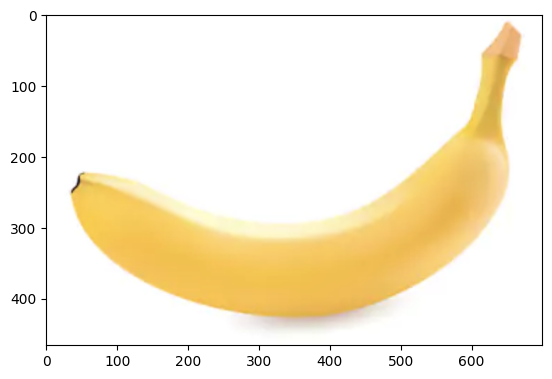

In [38]:
from tensorflow.keras.preprocessing.image import load_img
import random
filename = os.listdir(fresh_banana_train_dir)
sample = random.choice(filename)
image = load_img(os.path.join(fresh_banana_train_dir,sample))
print(image.size)
plt.imshow(image)

In [39]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import argparse
import cv2

In [42]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=15,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150,150),
                    batch_size = 15,
                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150,150),
                    batch_size= 15,
                    class_mode='categorical'
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [43]:
baseModel = ResNet50V2(weights="imagenet",include_top=False, input_tensor=Input(shape=(150,150,3)))

headModel=baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(6, activation="softmax")(headModel)

model = Model(inputs=baseModel.input,outputs=headModel)

for layer in baseModel.layers: layer.trainable=False

94668760/94668760 [==============================] - 4s 0us/step


In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']         

In [47]:
import tensorflow as tf
model.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3,decay=1e-3/25),
    metrics=["accuracy"]
)

In [48]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch = len(train_generator)//15,
    validation_steps=len(validation_generator)//15,
    epochs=30,
    verbose=1
)

Epoch 1/30
48/48 [==============================] - 88s 2s/step - loss: 0.4251 - accuracy: 0.5611 - val_loss: 0.1413 - val_accuracy: 0.8778
Epoch 2/30
48/48 [==============================] - 73s 2s/step - loss: 0.2141 - accuracy: 0.7696 - val_loss: 0.1158 - val_accuracy: 0.8389
Epoch 3/30
48/48 [==============================] - 82s 2s/step - loss: 0.1793 - accuracy: 0.8139 - val_loss: 0.0698 - val_accuracy: 0.9389
Epoch 4/30
48/48 [==============================] - 101s 2s/step - loss: 0.1596 - accuracy: 0.8569 - val_loss: 0.1097 - val_accuracy: 0.8833
Epoch 5/30
48/48 [==============================] - 80s 2s/step - loss: 0.1386 - accuracy: 0.8569 - val_loss: 0.0784 - val_accuracy: 0.8944
Epoch 6/30
48/48 [==============================] - 80s 2s/step - loss: 0.1269 - accuracy: 0.8778 - val_loss: 0.0536 - val_accuracy: 0.9444
Epoch 7/30
48/48 [==============================] - 77s 2s/step - loss: 0.1082 - accuracy: 0.9042 - val_loss: 0.0742 - val_accuracy: 0.9333
Epoch 8/30
48/48 [=

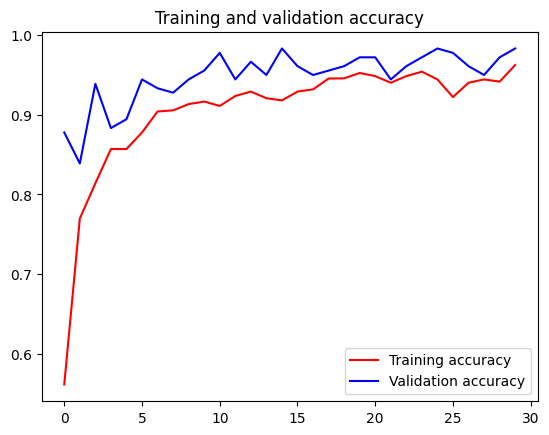

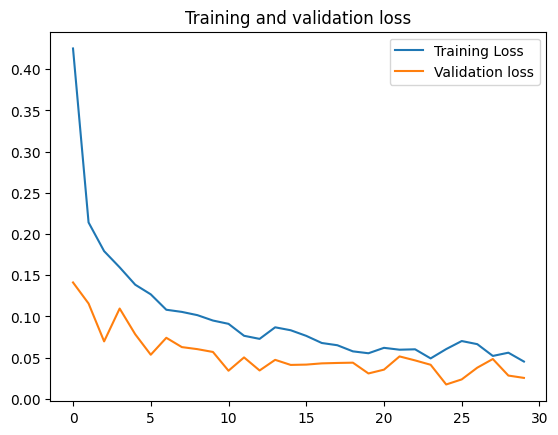

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc,'r', label='Training accuracy')
plt.plot(epochs,val_acc,'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

In [50]:
model.evaluate(validation_generator)

180/180 [==============================] - 210s 1s/step - loss: 0.0272 - accuracy: 0.9744


[0.02721329592168331, 0.9744254946708679]

In [51]:
result = model.evaluate_generator(validation_generator)
print(result)
print('Accuracy: ', result[1])

<ipython-input-51-4f4a46d27eb8>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = model.evaluate_generator(validation_generator)


[0.027213292196393013, 0.9744254946708679]
Accuracy:  0.9744254946708679


/content/dataset/dataset/test/freshapples/rotated_by_60_Screen Shot 2018-06-08 at 5.20.51 PM.png
1/1 [==============================] - 1s 1s/step
[[0. 0. 1. 0. 0. 0.]]
fresh orange


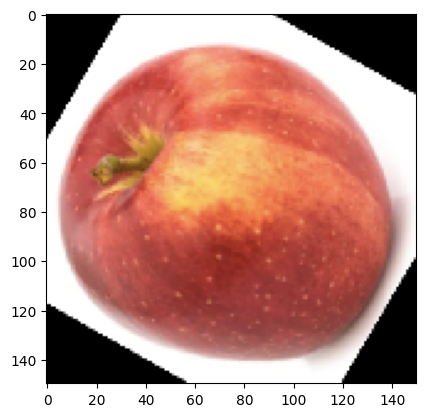

In [56]:

img_to_array = tf.keras.preprocessing.image.img_to_array
names = [fresh_apples_test_dir,
         fresh_banana_test_dir,
         fresh_oranges_test_dir,
         rotten_apples_test_dir,
         rotten_banana_test_dir,
         rotten_oranges_test_dir
]
name_rand = random.choice(names)


filename = os.listdir(name_rand)
sample = random.choice(filename)
fn = os.path.join(name_rand,sample)
print(fn)


img = load_img(fn, target_size=(150, 150))
plt.imshow(img)


x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)


prediction = ''

if classes[0][0]==1:
    prediction = 'fresh apple'
elif classes[0][1]==1:
    prediction = 'fresh banana'
elif classes[0][2]==1:
    prediction = 'fresh orange'
elif classes[0][3]==1:
    prediction = 'rotten apple'
elif classes[0][4]==1:
    prediction = 'rotten banana'
elif classes[0][5]==1:
    prediction = 'rotten orange'

print(prediction)